In [1]:
from transformers import AutoTokenizer

In [5]:
import pickle
from tqdm.auto import tqdm
fname = 'scores/scores_wd5m_v3_test_beam50.pickle'
scores_data = pickle.load(open(fname, 'rb'))

In [7]:
from collections import defaultdict
predictions_scores_dicts = []
for string_arr, score_arr in tqdm(zip(scores_data['prediction_strings'], scores_data['scores'])):
    ps_pairs = [(p,s) for p,s in zip(string_arr, score_arr)]
    ps_pairs = list(set(ps_pairs)) # while sampling, duplicates are created
    # remove predictions that are not entities
    ps_dict_only_entities = defaultdict(list)
    for ps in ps_pairs:
        if ps[0] in entity_strings_set:
            ps_dict_only_entities[ps[0]] = ps[1]
    predictions_scores_dicts.append(ps_dict_only_entities)

NameError: name 'entity_strings_set' is not defined

In [9]:
# scores_data has 4 keys
id = 2
print(scores_data['prediction_strings'][id])
# print(scores_data['scores'][id])
print(scores_data['input_strings'][id])
print(scores_data['target_strings'][id])


['ship', 'sloop-of-war', 'Wikimedia disambiguation page', 'pre-dreadnought battleship', 'destroyer', 'full-rigged ship', 'mine countermeasures vessel', 'amphibious assault ship', 'sloop-of-war - class of fleet minesweeping same-sex marriage', 'ironclad warship', 'sloop-of-war - class of fleet minesweeping same-sexual', 'sloop-of-war - class of fleet minesweeping sloop-of', 'sloop-of-war - class of fleet minesweeping submarines of the', 'sloop-of-war - class of fleet minesweeping same-powered', 'sloop - propulsion class of fleet minesweeping sloop-of-', 'sloop-of-war - class of fleet minesweeping same-sex union', 'sloop-of-war - class of fleet minesweeping same-ranks', 'sloop-of-war - class of fleet minesweeping sloops of Royal Navy', 'sloop-of-war - class of fleet minesweeping same-wave', 'sloop-of-war - class of torpedo boat destroyers of the Royal Navy', 'sloop-of-war - class of fleet minesweepers of the Royal Navy', 'sloop-of-war - class of fleet minesweeping same-sex education', 's

In [10]:
from transformers import T5Tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')

In [11]:
tokenizer('hello world').input_ids

[21820, 296, 1]

In [13]:
tokenized_targets = []
for target in tqdm(scores_data['target_strings']):
    tokenized = tokenizer(target).input_ids
    tokenized_targets.append(tokenized)

In [14]:
lengths = []
for tt in tokenized_targets:
    lengths.append(len(tt))

Text(0.5, 0, 'Tokenized lengths')

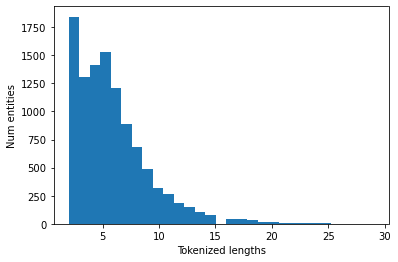

In [19]:
import matplotlib.pyplot as plt 

import numpy as np 

%matplotlib inline

# x = np.random.normal(size = 1000) 
x = lengths
plt.hist(x, bins=29) 

plt.ylabel('Num entities');
plt.xlabel('Tokenized lengths')

In [20]:
sum(lengths)/len(lengths)

5.686900958466453